En lo siguiente se extraen algunos datos correspondientes a los investigadores que pertenecen al SNI.

In [16]:
import warnings
warnings.filterwarnings("ignore", 'This pattern has match groups')
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use("ggplot")
mpl.rcParams['xtick.labelsize'] = 6 
mpl.rcParams['ytick.labelsize'] = 6 
%matplotlib inline

# Datos tomados de: http://datosabiertos.conacyt.gob.mx/publico/default.aspx
filename = "data/inv_sni.csv"
data = pd.read_csv(filename, encoding="latin1") # leyendo datos
data.drop(data.columns[range(8,17)],axis=1,inplace=True) # Limpiando datos

## Generalidades

El número de total de investigadores

In [17]:
NUM_INV = len(data)

Investigadores eméritos

In [18]:
emeritos = data['EMERITO'].value_counts().E
emeritos

108

## Por niveles

In [19]:
niveles = data['NIVEL'].value_counts().to_frame()
niveles

,NIVEL
1,12775
C,4575
2,3964
3,2002


## Por género

In [20]:
genero = data["GENERO"].value_counts().to_frame("INVESTIGADORES")
genero["PORCENTAJE"] = 100*genero["INVESTIGADORES"]/(NUM_INV)
genero

,INVESTIGADORES,PORCENTAJE
H,14969,64.200549
M,8347,35.799451


## Por estados

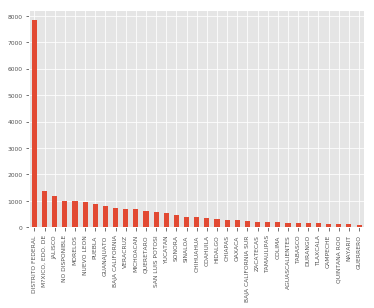

In [21]:
estados = data['ESTADO'].value_counts()
x = range(len(estados))
plt.bar(x, estados.get_values(), 0.5, align="center")
plt.xticks(x, estados.keys(), rotation="vertical")
plt.xlim(min(x)-0.5, max(x)+0.5);

In [22]:
ninv = sum(estados.values) # No. total de investigadores
prc_df = estados.to_frame("INVESTIGADORES")
prc_df["Porcentaje"] = 100*prc_df['INVESTIGADORES']/ninv
prc_df

,INVESTIGADORES,Porcentaje
DISTRITO FEDERAL,7831,33.587819
"M?XICO, EDO. DE",1361,5.837444
JALISCO,1197,5.134034
NO DISPONIBLE,1013,4.344842
MORELOS,1008,4.323397
NUEVO LEON,962,4.126099
PUEBLA,881,3.778683
GUANAJUATO,801,3.435557
BAJA CALIFORNIA,715,3.066695
VERACRUZ,701,3.006648


## Por instituciones

Las 20 instituciones con mayor número de investigadores

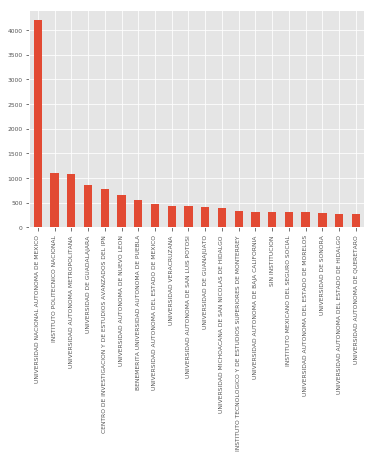

In [34]:
inst = data['INSTITUCION'].value_counts()
n = 20
x = range(len(inst))[:n]
plt.bar(x, inst.get_values()[:n], 0.5, align="center")
plt.xticks(x, inst.keys()[:n], rotation=90)
plt.xlim(min(x)-0.5, max(x)+0.5);

## Sobre las instituciones del Tecnológico Nacional de México (TECNM)

Lo subsiguiente presenta el porcentaje de representación de las instituciones correspondientes al Tecnológico Nacional de México: es decir, todos los institutos tecnológicos centralizados y descentralizados, más el CENIDET y CIIDET.

In [24]:
TECNOLOGICOS = sum(inst[inst.index.str.contains("INSTITUTO TECNOLOGICO (SUP|DE)")])
CENIDET = sum(inst[inst.index.str.contains("CENTRO NACIONAL DE INV*")])
CIIDET = sum(inst[inst.index.str.contains("INTERDISCIPLINARIO [\w*\s*\.]* EDUCACION")])
porcentaje_tecnm = 100*(TECNOLOGICOS + CENIDET + CIIDET)/NUM_INV
porcentaje_tecnm

2.5347400926402472

Los 20 tecnológicos con mayor cantidad de investigadores son:

In [29]:
(inst[inst.index.str.contains("INSTITUTO TECNOLOGICO (SUP|DE)")][:20]).to_frame("No. de Investigadores")

,No. de Investigadores
INSTITUTO TECNOLOGICO DE CELAYA,45
INSTITUTO TECNOLOGICO DE SONORA,43
INSTITUTO TECNOLOGICO DE TIJUANA,37
INSTITUTO TECNOLOGICO DE CIUDAD MADERO,25
INSTITUTO TECNOLOGICO DE MORELIA,23
INSTITUTO TECNOLOGICO DE VERACRUZ,20
INSTITUTO TECNOLOGICO DE TOLUCA,20
INSTITUTO TECNOLOGICO DE AGUASCALIENTES,19
INSTITUTO TECNOLOGICO DE CONKAL,16
INSTITUTO TECNOLOGICO DE ORIZABA,13
